In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

In [5]:
data=pd.read_csv("Titanic-Dataset.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_new=data.drop(['Pclass','Name','Parch','Cabin','Embarked'],axis=1)
data_new.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Ticket,Fare
0,1,0,male,22.0,1,A/5 21171,7.2500
1,2,1,female,38.0,1,PC 17599,71.2833
2,3,1,female,26.0,0,STON/O2. 3101282,7.9250
3,4,1,female,35.0,1,113803,53.1000
4,5,0,male,35.0,0,373450,8.0500


In [7]:
data_new.describe().round(3)

,PassengerId,Survived,Age,SibSp,Fare
count,891.000,891.000,714.000,891.000,891.000
mean,446.000,0.384,29.699,0.523,32.204
std,257.354,0.487,14.526,1.103,49.693
min,1.000,0.000,0.420,0.000,0.000
25%,223.500,0.000,20.125,0.000,7.910
50%,446.000,0.000,28.000,0.000,14.454
75%,668.500,1.000,38.000,1.000,31.000
max,891.000,1.000,80.000,8.000,512.329


In [9]:
data_new.isnull().sum()

PassengerId      0
Survived         0
Sex              0
Age            177
SibSp            0
Ticket           0
Fare             0
dtype: int64

In [10]:
data_new['Age']=data_new['Age'].fillna(data_new['Age'].mean())
data_new['Fare']=data_new['Fare'].fillna(data_new['Fare'].mean())
data_new.isnull().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Ticket         0
Fare           0
dtype: int64

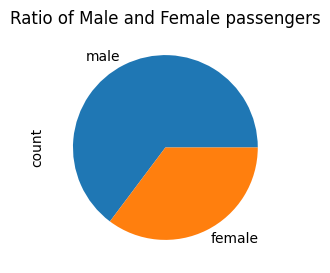

In [11]:
ax=data_new['Sex'].value_counts().plot(kind='pie',x = 'Survived',figsize=(5,3))   
plt.title("Ratio of Male and Female passengers")
plt.show()

In [12]:
Embarked = data['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> S
-> C
-> Q
-> nan


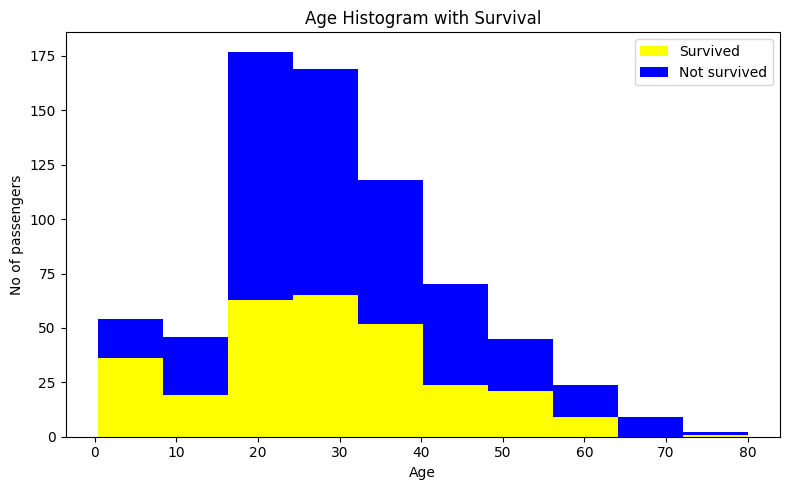

In [13]:
fig = plt.figure(figsize=(8, 5))
plt.hist(x=[data[data['Survived'] == 1]['Age'], data[data['Survived'] == 0]['Age']], 
         histtype='barstacked', color=['yellow', 'b'], label=['Survived', 'Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()
plt.tight_layout()
plt.show()


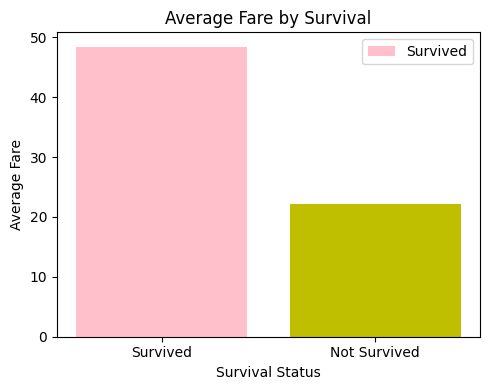

In [14]:
fig = plt.figure(figsize=(5, 4))

# Aggregate the data by survival and compute the mean or sum of fares.
survived_fare = data[data['Survived'] == 1]['Fare'].mean()
not_survived_fare = data[data['Survived'] == 0]['Fare'].mean()

# X-axis labels and corresponding fare values
categories = ['Survived', 'Not Survived']
fare_values = [survived_fare, not_survived_fare]

# Create the bar chart
plt.bar(categories, fare_values, color=['pink', 'y'])

plt.title('Average Fare by Survival')
plt.xlabel('Survival Status')
plt.ylabel('Average Fare')
plt.legend(['Survived', 'Not survived'])
plt.tight_layout()
plt.show()


In [15]:
x=data_new.drop(['Survived'],axis=1)
y=data_new['Survived']
     


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [18]:
print(x_train.isnull().sum())


PassengerId    0
Sex            0
Age            0
SibSp          0
Ticket         0
Fare           0
dtype: int64


In [40]:
x_train.fillna(0, inplace=True)  


In [41]:

x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [21]:
predictions=knn.predict(x_test)
print(predictions)

[0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [23]:
print(cm)

[[87 18]
 [46 28]]


In [24]:
print(ac)

0.6424581005586593


In [25]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [26]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
predictions=tree.predict(x_test)
print(predictions)

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [29]:
print(cm)

[[88 17]
 [27 47]]


In [30]:
print(ac)

0.7541899441340782


In [31]:
from sklearn.svm import SVC
svm=SVC()

In [32]:
svm.fit(x_train,y_train)

SVC()

In [33]:
predictions=svm.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [35]:
print(cm)

[[104   1]
 [ 68   6]]


In [36]:
print(ac)

0.6145251396648045


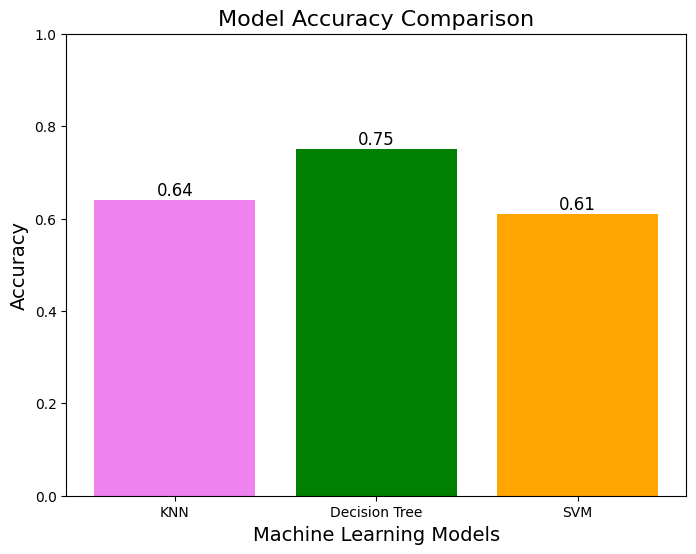

In [2]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['KNN', 'Decision Tree', 'SVM']
accuracies = [0.64,0.75, 0.61]  # Replace these values with your model's actual accuracy scores

# Plotting the bar graph
plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=['violet', 'green', 'orange'])

# Adding title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Machine Learning Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Show accuracy values on top of the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f"{accuracies[i]:.2f}", ha='center', fontsize=12)

# Display the plot
plt.ylim(0, 1)  
plt.show()
